In [ ]:
import os 
import pandas as pd
import numpy as np
import h5py
import json
from numpy import nan
from datetime import datetime, timedelta, date
from fractions import Fraction
from time import mktime
import time
import requests
import os.path
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [62]:
import seaborn as sns


In [11]:
def load_from_checkpoint(checkpoint_name):
    if os.path.isfile(checkpoint_name):
        return pd.read_hdf(checkpoint_name,'table')

In [12]:
df = save_or_load_from_checkpoint('./checkpoints/data_categorical.h5')  

In [16]:
df.describe()

,device_id_name,event,regression_value_type,value,week,day,month,hour,minute,second,sun,outside_temperature
count,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000,849291.000000
mean,88.255114,21.630809,2.070179,8852.091961,26.313542,15.922648,6.474731,10.192733,27.047131,27.815570,0.222275,50.092220
std,60.561518,2.088379,1.053972,21528.461239,16.900240,8.831251,3.887760,7.275663,18.323413,17.736202,0.415775,16.194951
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.910000
25%,35.000000,22.000000,1.000000,0.000000,10.000000,8.000000,3.000000,4.000000,10.000000,11.000000,0.000000,38.490000
50%,75.000000,22.000000,3.000000,0.000000,21.000000,16.000000,5.000000,8.000000,27.000000,27.000000,0.000000,49.690000
75%,129.000000,22.000000,3.000000,0.000000,42.000000,23.000000,10.000000,17.000000,43.000000,43.000000,0.000000,62.610000
max,212.000000,22.000000,3.000000,65535.000000,52.000000,31.000000,12.000000,23.000000,59.000000,59.000000,1.000000,91.850000


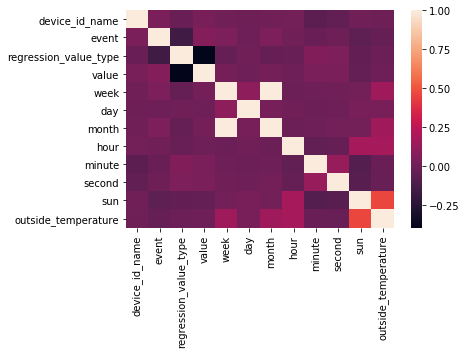

In [15]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
df[['event', 'sun']].groupby(['sun'], as_index=False).sum()

,sun,event
0,0,14329637
1,1,4041214


In [43]:
df.event.unique()

array([22,  6,  5,  1, 20, 21,  4,  0, 17, 13,  7, 16, 14, 15,  9,  8, 10,
       11, 19,  3,  2, 12, 18])

In [51]:
door_lock_df = df.loc[df['event'].isin([6, 7])]

In [53]:
door_lock_df[['event', 'hour']].groupby(['hour'], as_index=False).sum()

,hour,event
0,0,6
1,1,13
2,2,20
3,3,81
4,4,13
5,5,7
6,6,44
7,7,7
8,8,1020
9,9,769


In [56]:
climate_df = df.loc[df['regression_value_type'] == 0]

(array([2.6500e+02, 0.0000e+00, 2.1000e+01, 0.0000e+00, 4.7800e+02,
        3.0172e+04, 6.5920e+03, 0.0000e+00, 0.0000e+00, 1.5000e+01]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

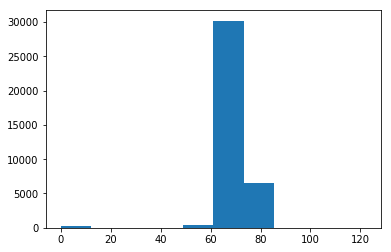

In [74]:
fig, ax = plt.subplots()
# ax.scatter(climate_df.value.values, climate_df.hour.values)
ax.hist(climate_df.value.values)